Import the needed packages for the project


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Predicting a person's credit card score is important because it can help financial institutions make informed decisions about who to lend money to. By using a classifier with the ability to predict credit card scores, financial institutions can more accurately assess an individual's creditworthiness and determine important things such as their likelihood of repaying a loan. This can help the institution make more informed lending decisions, which can ultimately reduce their financial risk and improve their overall profitability. Additionally, a classifier with this ability can be useful for individuals as well, as it can help them understand their own creditworthiness and make more informed financial decisions. The goal of this project is to identify trends and to create a model that can accurately classify people into credit score groups.

Here we are loading in the dataset. I got this dataset from kaggle and it contains observations, which are individual people. Each observation has 27 features ranging from age to payment behavior. The data has been divided into training and test data, so I import each seperately. The end goal is to train a model with "training" and see how well it works with "test"

In [2]:
training = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
training.head()

/var/folders/61/5w5fw9094ds4lst2bszw1l200000gn/T/ipykernel_36697/545241351.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  training = pd.read_csv("train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Here we want to eliminate columns of the dataframe in order to prevent our model from taking into account factors that don't matter. For example, something like ID isn't something we want the model to know because it may think that there is value in the number that we assign the person. For reasons similiar to this we also remove customer ID, month, name, and SSN.

In [3]:
training = training.drop(columns ="Customer_ID")
training = training.drop(columns ="Month")
training = training.drop(columns ="Name")
training = training.drop(columns ="SSN")

training.head()


,ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Now that we only have the data needed for the project. We have to clean up the data to have accurate information only. For example, we don't want things such as "age: -500". We have to do things such as remove extra dashes and change the type of certain columns. This is done for several columns, all with their own issues within thier data.

In [4]:
# amount invested monthly
training["Amount_invested_monthly"] = training["Amount_invested_monthly"].replace( "__10000__", 10000.00)
training["Amount_invested_monthly"] = training["Amount_invested_monthly"].astype("float64")
# monthly balance
training["Monthly_Balance"] = training["Monthly_Balance"].replace("__-333333333333333333333333333__", 0)
training["Monthly_Balance"] = training["Monthly_Balance"].astype("float64")
#delayed payment
training["Num_of_Delayed_Payment"] = training["Num_of_Delayed_Payment"].str.replace(r"_$", "", regex=True)
training["Num_of_Delayed_Payment"] = training["Num_of_Delayed_Payment"].astype("float64")
#annual income
training["Annual_Income"] = training["Annual_Income"].str.replace(r"_$", "", regex=True)
training["Annual_Income"] = training["Annual_Income"].astype("float64")
#age
training["Age"] = training["Age"].str.replace(r"_$", "", regex=True)
training["Age"] = training["Age"].astype("int64")
training["Age"] = training["Age"].apply(lambda x: x if x > 0 and x < 115 else np.nan)
# Occupation
training["Occupation"] = training["Occupation"].replace("_______", np.nan)
# payment behavior
training["Payment_Behaviour"] = training["Payment_Behaviour"].replace("!@9#%8", "Medium_spent_Medium_value_payments")
# number of loans
training["Num_of_Loan"] = training["Num_of_Loan"].str.replace(r"_$", "", regex=True)
training["Num_of_Loan"] = training["Num_of_Loan"].astype("int64")
training["Num_of_Loan"] = training["Num_of_Loan"].apply(lambda x:  x if x >= 0 else np.nan)
# credit mix
training["Credit_Mix"] = training["Credit_Mix"].replace("_", "")
training["Credit_Mix"] = training["Credit_Mix"].replace("-", "")
# changing credit limit
training["Changed_Credit_Limit"] = training["Changed_Credit_Limit"].replace("_", 0)
training["Changed_Credit_Limit"] = training["Changed_Credit_Limit"].astype("float64")
# drop duplicate ids
training.drop_duplicates(subset="ID", inplace=True)
training = training.drop(columns ="ID")
#get values out of "credit history age"
training["Credit_History_Age"] = training["Credit_History_Age"].str.extract(r'(\d+)')
training["Credit_History_Age"] = training["Credit_History_Age"].replace(np.nan, 0)
# deletes the row if age or num is NaN
training = training.dropna(subset=["Age", "Num_of_Loan"])

# print new
training.head(50)


,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,,809.98,26.822620,22,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,Good,809.98,31.944960,0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,23.0,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.377862,22,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,...,Good,809.98,24.797347,22,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,23.0,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,...,Good,809.98,27.262259,22,No,49.574949,62.430172,Medium_spent_Medium_value_payments,340.479212,Good
6,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.537593,22,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,23.933795,0,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,28.0,NaN,34847.84,3037.986667,2,4,6,1.0,Credit-Builder Loan,3,...,Good,605.03,24.464031,26,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,Credit-Builder Loan,7,...,Good,605.03,38.550848,26,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
10,28.0,Teacher,34847.84,3037.986667,2,1385,6,1.0,Credit-Builder Loan,3,...,,605.03,33.224951,26,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard


Now that the data has been preprocessed and cleaned, we are ready to move on to the next phase of the analysis: exploratory data analysis. This is an important step that allows us to gain a better understanding of the data and identify any patterns or trends that may be present. We will now be looking at how certain variables may affect the classification of an individual's credit score. In other words, we will be trying to identify which variables are most important for predicting an individual's credit score. This is important for us to know because this will ultimately be the factor that allows us to create an accurate classifier.

On first thought, the immediate idea is to create a graph with all the variables and see which has the highest correlation

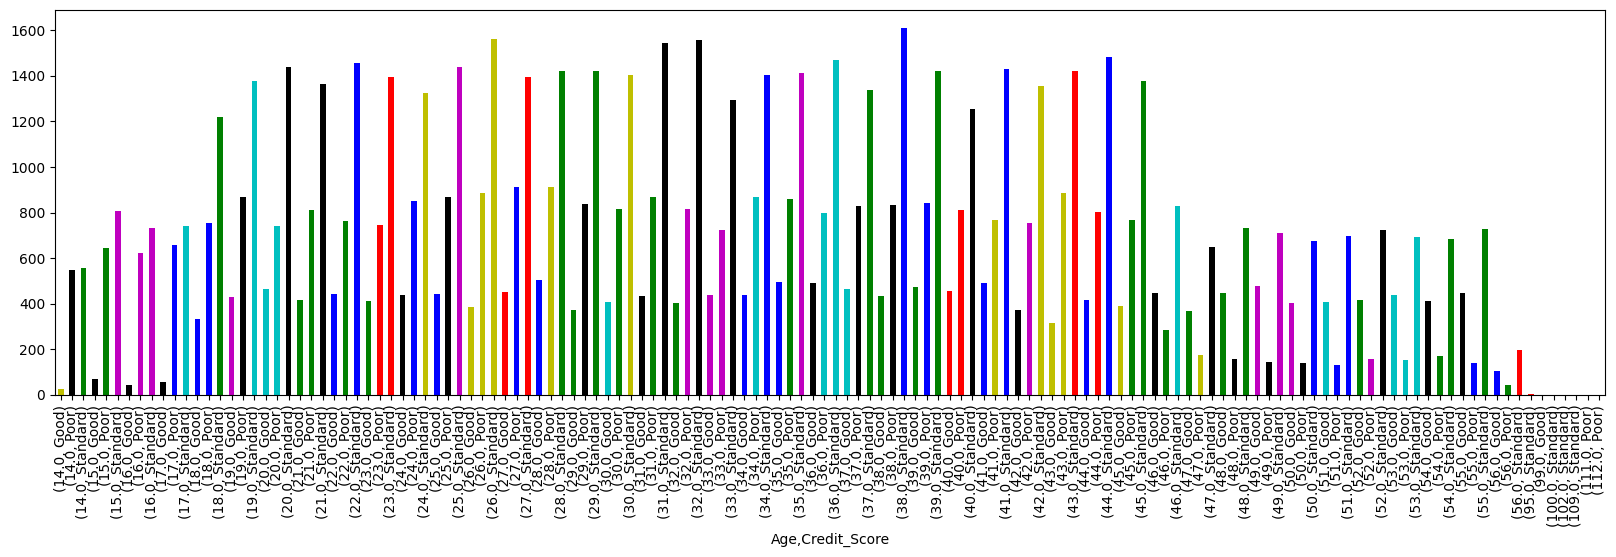

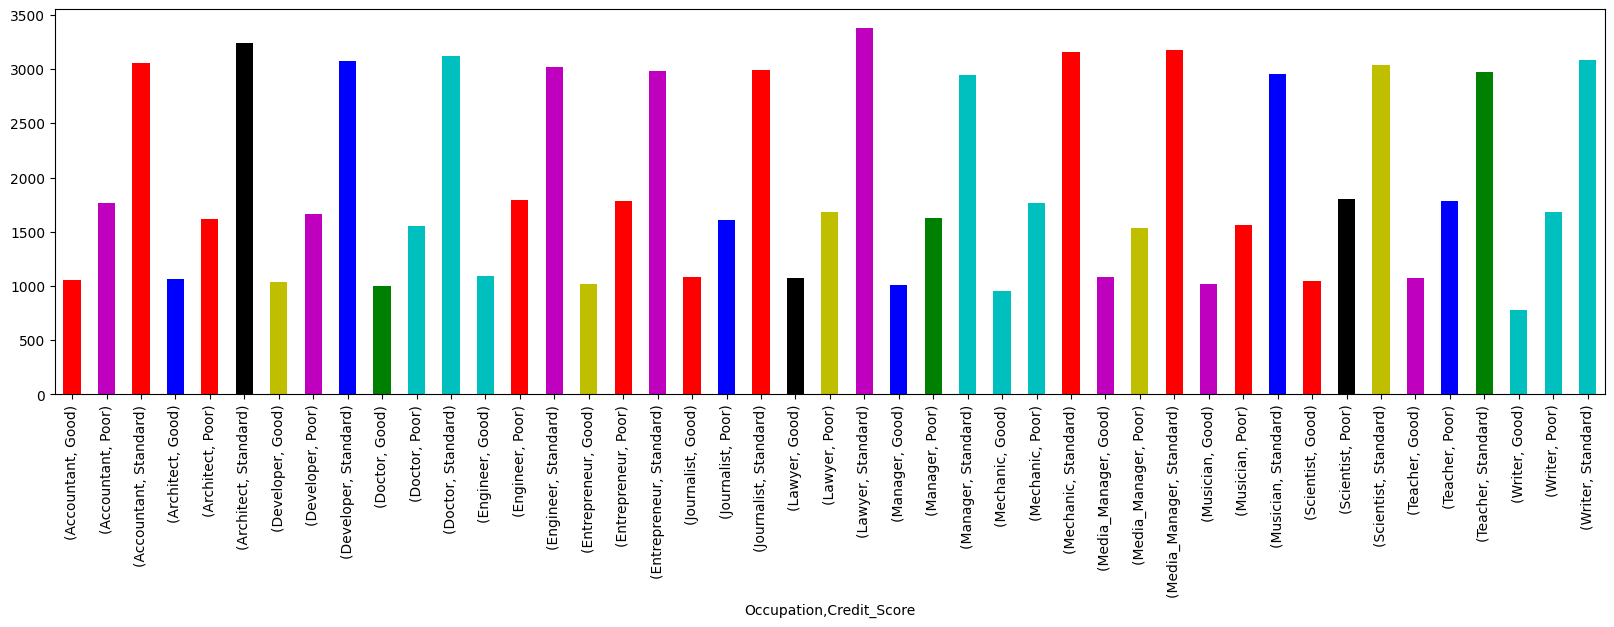

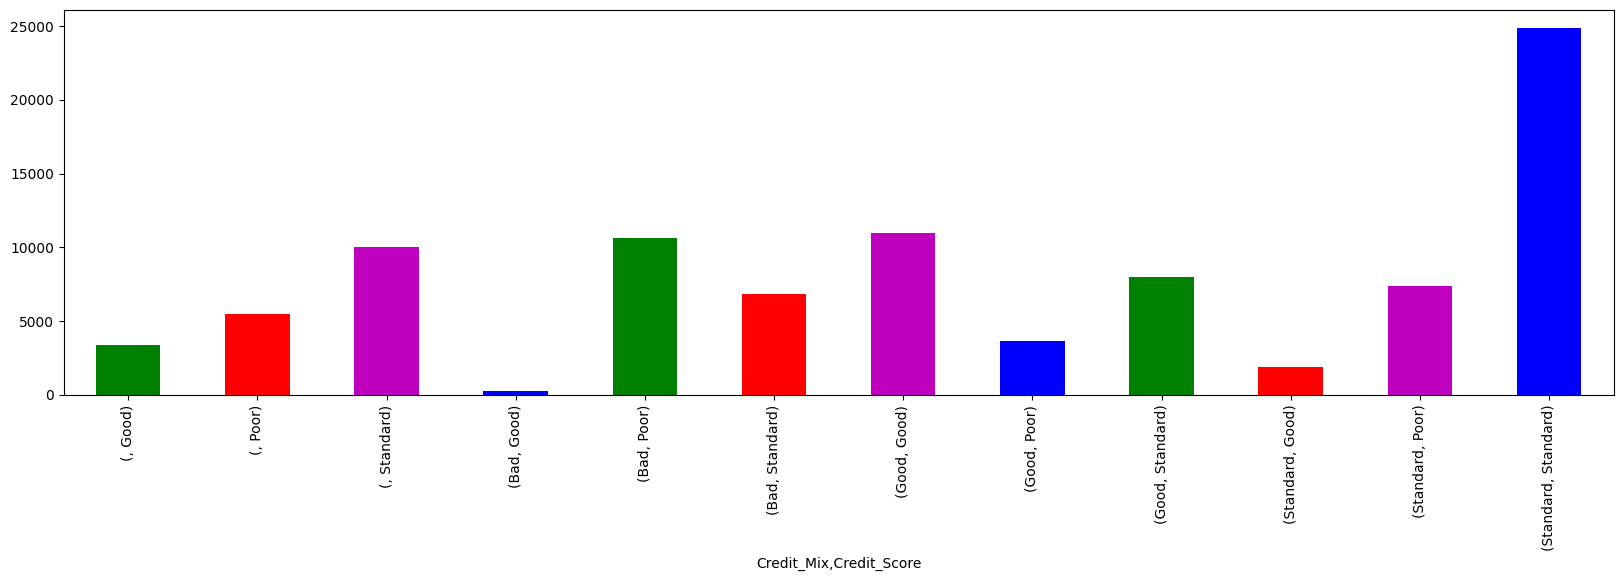

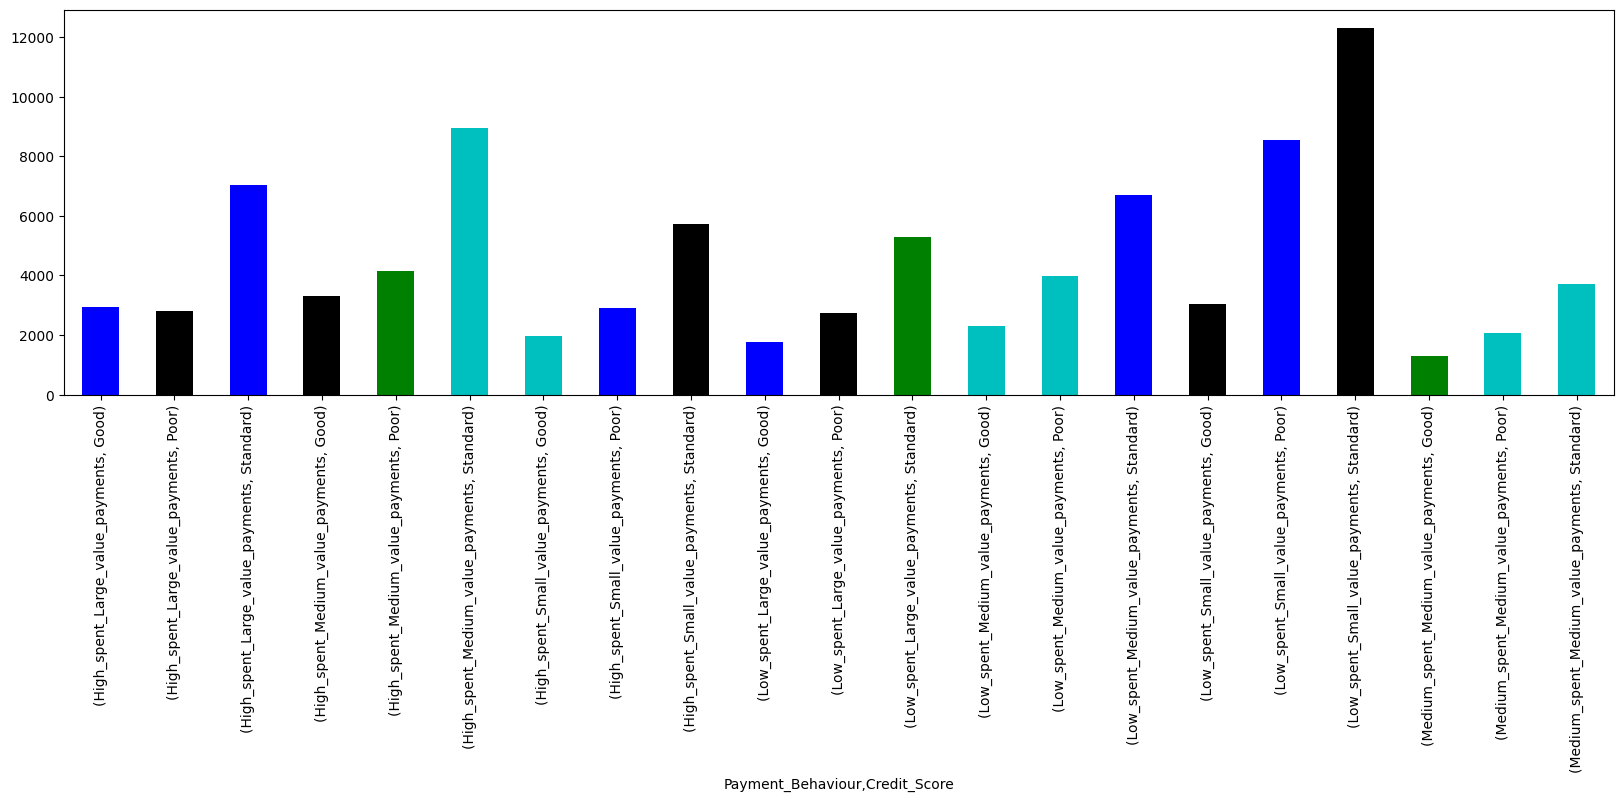

In [5]:
columns = ["Age", "Occupation", "Annual_Income"]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# Age
categoryTypes = training["Age"].unique()
groups = training.groupby(["Age", 'Credit_Score']).size()
groups.plot(kind='bar', color=[random.choice(colors) for i in categoryTypes], figsize=(20, 5))
plt.show()

# Occupation
categoryTypes = training["Occupation"].unique()
groups = training.groupby(["Occupation", 'Credit_Score']).size()
groups.plot(kind='bar', color=[random.choice(colors) for i in categoryTypes], figsize=(20, 5))
plt.show()

# Credit_Mix
categoryTypes = training["Credit_Mix"].unique()
groups = training.groupby(["Credit_Mix", 'Credit_Score']).size()
groups.plot(kind='bar', color=[random.choice(colors) for i in categoryTypes], figsize=(20, 5))
plt.show()

# behavior
categoryTypes = training["Payment_Behaviour"].unique()
groups = training.groupby(["Payment_Behaviour", 'Credit_Score']).size()
groups.plot(kind='bar', color=[random.choice(colors) for i in categoryTypes], figsize=(20, 5))
plt.show()

Looking at the above graphs, we can see a few things. There is a higher percentage of people with "Standard" credit scores in the ages between 18 and 45 than before 18 and after 45. Occupation seemed to have no impact on what credit score you will have, with each of the different occupations having around the same number of people in the poor, standard, and good rankings. Lawyers had a very slight increase in the amount of "good", but it is not significant enough to draw any conclusion from. However, in the third graph, we can see that having a better credit mix does seem to correlate to having a better credit score category. It seems that low spending and small value payments leads to a higher number of standard and good credit scores, so this may be a behavior to possibly be on the look out for. This also may just be a common practice because it also yielded the most "poor" score too.

We now have a better idea on how some categorical variables impact credit score classifications. We should take a look at some of the other numerical variables and how they correlate to credit scores. These give a concrete idea of which variables may be more important than others. 

<AxesSubplot: title={'center': 'Plotting Num_Credit_Inquiries of those in different credit score groups'}, xlabel='Num_Credit_Inquiries', ylabel='Credit_Score'>

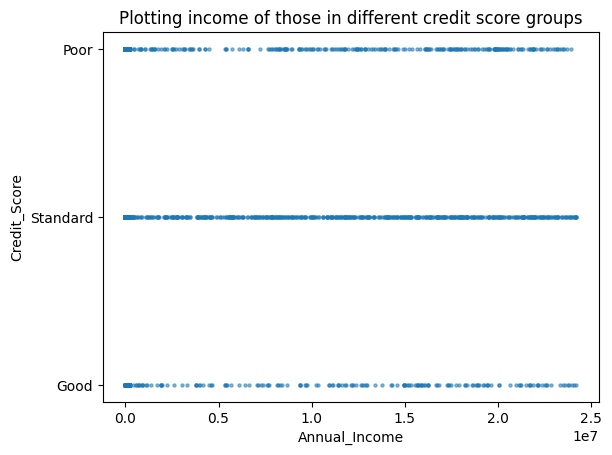

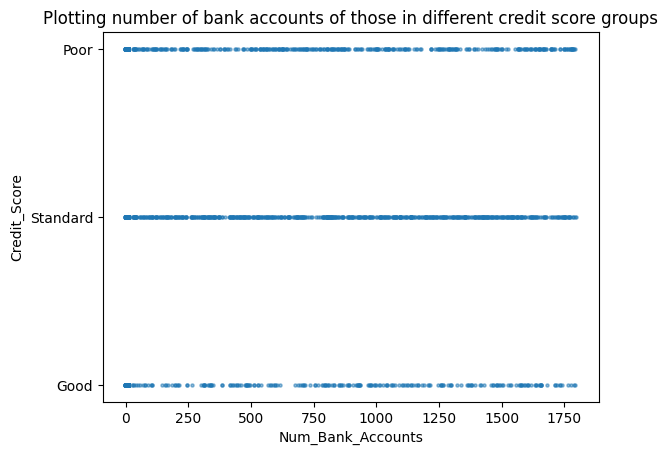

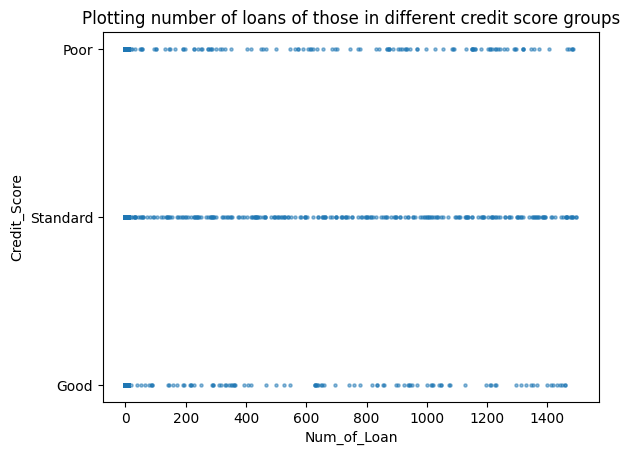

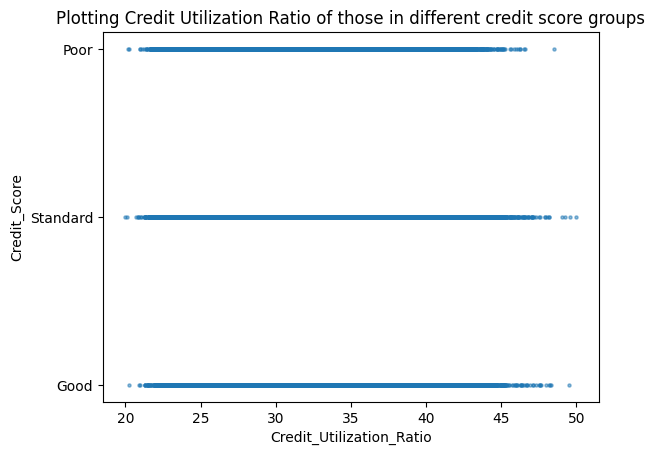

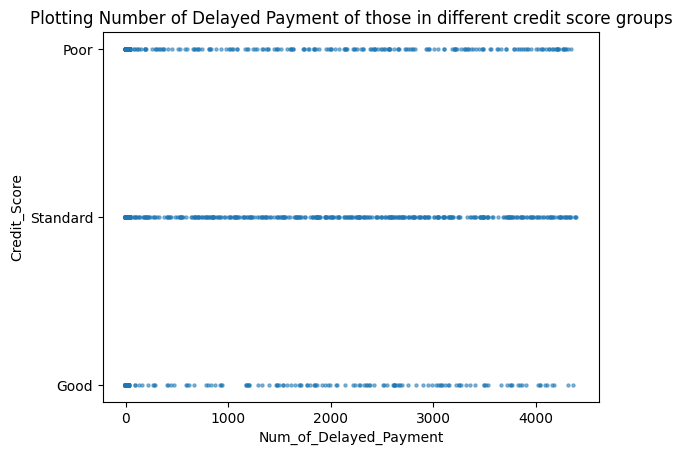

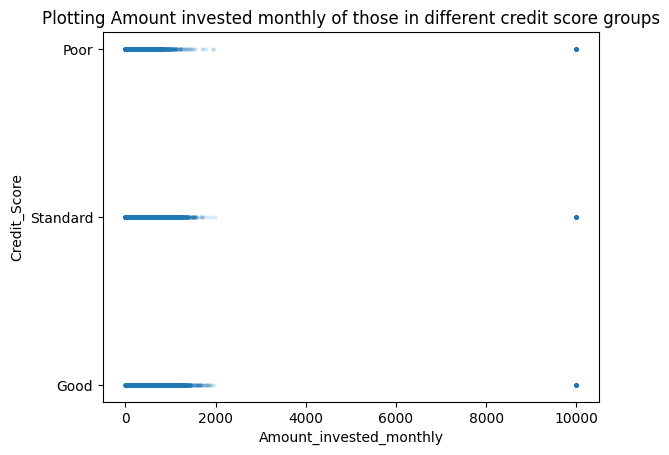

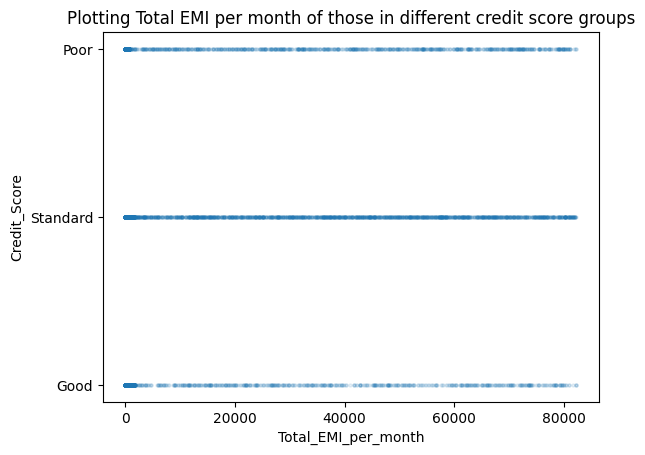

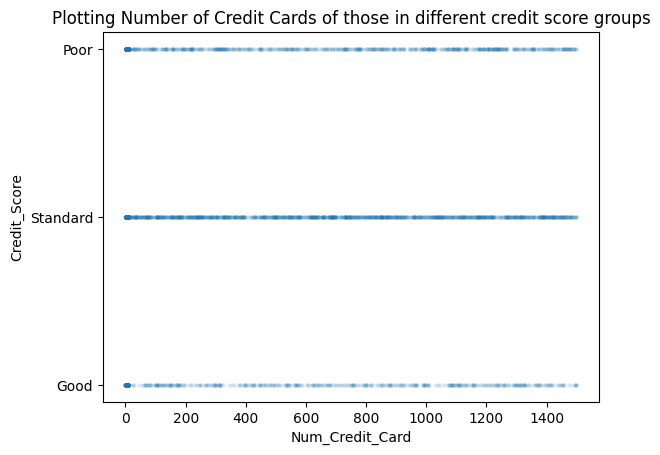

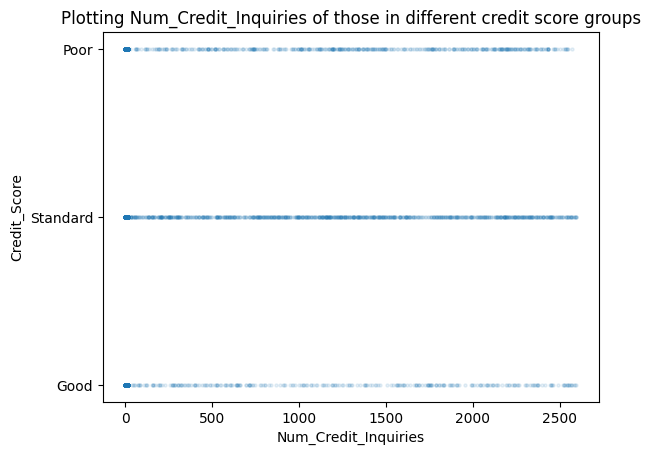

In [6]:
training.plot(y='Credit_Score', x='Annual_Income', kind='scatter', s=5, alpha=0.5, title='Plotting income of those in different credit score groups')
training.plot(y='Credit_Score', x='Num_Bank_Accounts', kind='scatter', s=5, alpha=0.5, title='Plotting number of bank accounts of those in different credit score groups')
training.plot(y='Credit_Score', x='Num_of_Loan', kind='scatter', s=5, alpha=0.5, title='Plotting number of loans of those in different credit score groups')
training.plot(y='Credit_Score', x='Num_of_Delayed_Payment', kind='scatter', s=5, alpha=0.5, title='Plotting Number of Delayed Payment of those in different credit score groups')
training.plot(y='Credit_Score', x='Amount_invested_monthly', kind='scatter', s=5, alpha=0.1, title='Plotting Amount invested monthly of those in different credit score groups')
training.plot(y='Credit_Score', x='Total_EMI_per_month', kind='scatter', s=5, alpha=0.1, title='Plotting Total EMI per month of those in different credit score groups')
training.plot(y='Credit_Score', x='Num_Credit_Card', kind='scatter', s=5, alpha=0.1, title='Plotting Number of Credit Cards of those in different credit score groups')
training.plot(y='Credit_Score', x='Num_Credit_Inquiries', kind='scatter', s=5, alpha=0.1, title='Plotting Number of Credit Inquiries of those in different credit score groups')


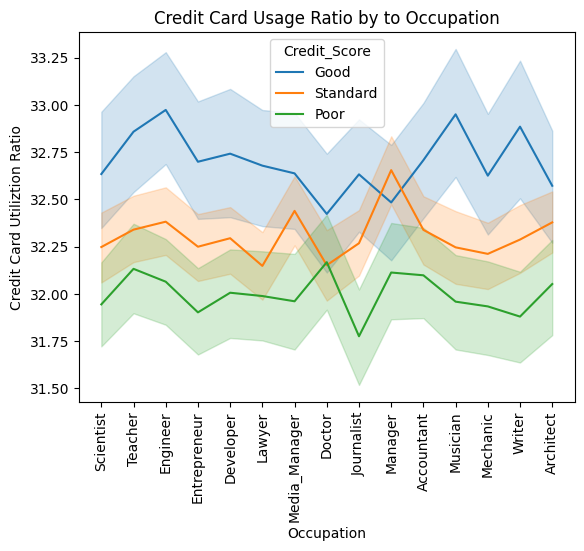

In [25]:
sns.lineplot(data=training, x="Occupation", y="Credit_Utilization_Ratio", hue="Credit_Score")
plt.xticks(rotation=90)
plt.title("Credit Card Usage Ratio by to Occupation")
plt.xlabel("Occupation")
plt.ylabel("Credit Card Utiliztion Ratio")
plt.show()

In these graphs we can see a lot of interesting things. For example, income was not as big of a factor on credit score as I thought it would be, with it being nearly uniformly across the range for each credit score group. Also, in nearly all the graphs shown above, we can see that the standard credit score group showed full variance between all the possible features range. It also seems that people with good credit scores have slightly less less loans. One of the clearest indicators of all the graphs was the number of delayed payments. Those with good credit scores had much less delayed payments on average. Those with poor credit scores had more on average. When looking at amount invested, we see a very similar distribution with all of them, however, good credit scores had a slightly more dense clustering on the right side of the group. This means that those with good credit scores on average, invest slightly more than those with worse credit scores. We can also see that those with good credit scores have lower total EMI than those with worse scores. In the final plot, we can see that the more you use a credit card, in general you have a a better credit score. The other graphs that I didn't mention either didn't convey a difference in behaviors, or the difference was too small to be conclusive.

Now that we have a better idea of how our data works and what variables may have the most impact on a credit score grouping, we are ready to move to the next step. We are now going to train our classifier to attempt to decide what kind of credit score someone has based on thier data. We are going to start with a random forest classifier since this usually yields postive results and is a good way to prevent overfitting. 

In [26]:
# label is the label that we are giving each observation
label = training["Credit_Score"]
training = training.drop("Credit_Score", axis=1) # we need to drop the label group before we pass in the data

# get the groups
xtrain, xtest, ytrain, ytest = train_test_split(training, label, test_size=0.2, random_state=1)

# Train the random forest classifier
forest = RandomForestClassifier()
forest.fit(xtrain, ytrain)

ValueError: could not convert string to float: 'Media_Manager'